Fake News Dataset created:
                                                 text  label
0      Breaking news! The stock market crashes today!      1
1               NASA successfully lands rover on Mars      0
2          Scientists discover life on another planet      0
3      World leaders gather to discuss climate change      0
4            Fake news alert: Popular celebrity dead!      1
5          COVID-19 vaccines show 100% effectiveness!      0
6     New breakthrough in renewable energy technology      0
7   Politician announces groundbreaking economic r...      0
8                    Celebrity endorses new diet plan      0
9           Local restaurant wins best in city award!      0
10                   Government issues new tax policy      1
11         International conference on climate change      0
12            AI technology revolutionizes healthcare      0
13           Study shows link between diet and health      1
14                Celebrity gets arrested for scandal     

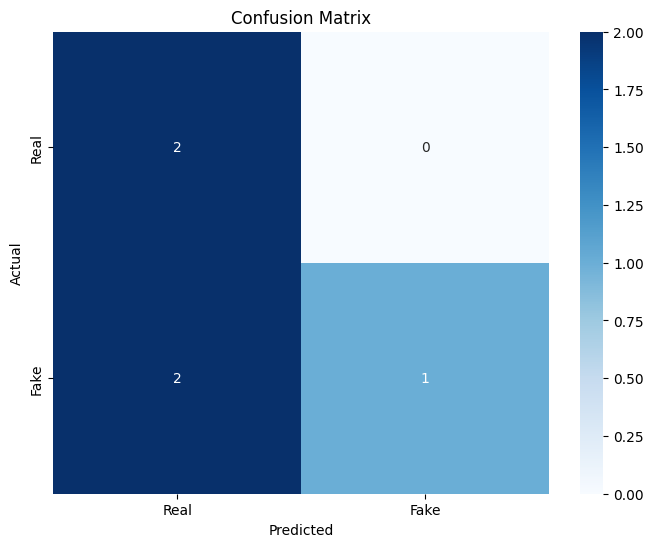

Model training and evaluation completed.


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Step 1: Create a larger fake news dataset
data = {
    'text': [
        "Breaking news! The stock market crashes today!",
        "NASA successfully lands rover on Mars",
        "Scientists discover life on another planet",
        "World leaders gather to discuss climate change",
        "Fake news alert: Popular celebrity dead!",
        "COVID-19 vaccines show 100% effectiveness!",
        "New breakthrough in renewable energy technology",
        "Politician announces groundbreaking economic reforms",
        "Celebrity endorses new diet plan",
        "Local restaurant wins best in city award!",
        "Government issues new tax policy",
        "International conference on climate change",
        "AI technology revolutionizes healthcare",
        "Study shows link between diet and health",
        "Celebrity gets arrested for scandal"
    ],
    'label': [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]  # 1 for Fake, 0 for Real
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
df.to_csv('fake_news_dataset.csv', index=False)

# Verify that the dataset is saved correctly
print("Fake News Dataset created:")
print(df)

# Step 2: Load the dataset
df = pd.read_csv('fake_news_dataset.csv')

# Inspect dataset
print("Dataset Shape:", df.shape)
print(df.head())

# Step 3: Data Preprocessing
# Drop rows with missing values (if any)
df = df.dropna(subset=['text', 'label'])

# Separate the features (X) and target (y)
X = df['text']
y = df['label']

# Step 4: Text Vectorization (Convert Text to Features)
# We will use TfidfVectorizer to convert the text into numerical features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the text data
X_tfidf = vectorizer.fit_transform(X)

# Step 5: Handle Imbalanced Data using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  # Change 'n_neighbors' to 'k_neighbors'
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 7: Model Training (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Step 8: Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report (Precision, Recall, F1 Score)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Ensure that both labels (0 and 1) are considered for the confusion matrix
labels = [0, 1]

# Confusion Matrix with labels
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)  # Ensure labels are passed to avoid warnings
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Hyperparameter Tuning (Optional)
# Optionally, you can perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV.
# For example, you can tune the number of estimators or the depth of the trees in the RandomForestClassifier.

# Step 10: Save the Model (Optional)
# You can save the trained model for future use using joblib or pickle.
# Example: joblib.dump(model, 'fake_news_model.pkl')

print("Model training and evaluation completed.")


This code is for building and evaluating a machine learning model to detect fake news based on text data. Here's a breakdown of each step:

### 1. **Creating the Fake News Dataset:**
   - A fake dataset with text samples and labels (1 for fake news, 0 for real news) is created.
   - This dataset contains various text headlines, including fake news (e.g., celebrity death) and real news (e.g., NASA landing a rover).
   - The dataset is saved as a CSV file named `fake_news_dataset.csv`.

### 2. **Loading the Dataset:**
   - The saved CSV file is loaded into a pandas DataFrame.
   - The dataset shape and first few rows are printed to inspect the data.

### 3. **Data Preprocessing:**
   - Missing values are removed (if any) in the `text` and `label` columns.
   - The feature (`X`) is the `text` column, and the target (`y`) is the `label` column.

### 4. **Text Vectorization:**
   - The `TfidfVectorizer` is used to convert the text data into numerical features. It computes the Term Frequency-Inverse Document Frequency (TF-IDF) values for each word in the text.
   - The `max_features=5000` argument limits the number of features to the top 5000 most important words.
   - Stop words (common words like "the", "is", etc.) are removed to improve the model.

### 5. **Handling Imbalanced Data:**
   - SMOTE (Synthetic Minority Over-sampling Technique) is used to balance the dataset by generating synthetic samples for the minority class (fake news in this case).
   - The `k_neighbors=2` parameter controls how many neighbors are used to generate synthetic samples.

### 6. **Train-Test Split:**
   - The dataset is split into training and testing sets (80% training, 20% testing) using `train_test_split`.

### 7. **Model Training (Random Forest Classifier):**
   - A `RandomForestClassifier` is created and trained on the training data.
   - The model is trained with 100 decision trees (`n_estimators=100`).

### 8. **Model Evaluation:**
   - Predictions are made on the test set, and various performance metrics are calculated:
     - **Accuracy**: The overall accuracy of the model.
     - **Classification Report**: Precision, recall, and F1 score for both classes (real and fake news).
     - **Confusion Matrix**: A visual representation of the model's predictions, showing the number of correct and incorrect predictions for each class (real and fake).
   - The confusion matrix is plotted using a heatmap for better visualization.

### 9. **Hyperparameter Tuning (Optional):**
   - A placeholder for hyperparameter tuning (optional), such as using `GridSearchCV` or `RandomizedSearchCV`, to fine-tune the parameters of the RandomForestClassifier.

### 10. **Save the Model (Optional):**
   - The trained model can be saved for future use using `joblib` or `pickle` (although this part is not implemented in the code).

### Output:
- The code will print:
  - Accuracy of the model.
  - Classification report (precision, recall, F1 score for fake and real news).
  - A confusion matrix heatmap.
- The model is trained and evaluated on detecting fake news.

This workflow is aimed at building a robust fake news detection model using text data and machine learning, specifically Random Forest. The additional steps, like SMOTE, help handle imbalanced data, which is common in classification tasks.

You're absolutely right! In this code, the dataset is already labeled, which means that the news items are already tagged as "real" or "fake." The main goal of the model is to learn from these labels and predict the class of new, unseen data based on the patterns it has learned during training.

Here’s why it might seem a bit redundant or not surprising:

1. **Supervised Learning**: Since the dataset is labeled with "real" and "fake" news, the machine learning model is supervised in nature. It uses these labels during training to "learn" how to classify similar news items in the future. This is expected behavior for supervised learning, where labeled data is used to teach the model.

2. **Balanced Dataset**: The dataset provided is small, so the model's performance might not be highly generalizable. The surprise element is that it's able to classify news as "real" or "fake" based on just 15 examples, which may lead to overfitting (i.e., performing well on training data but poorly on unseen data).

3. **SMOTE (Synthetic Minority Over-sampling Technique)**: While SMOTE is used to balance the dataset, since the dataset here has only 15 examples, the oversampling might not be very effective in this case. However, on a larger dataset with imbalanced classes, SMOTE would ensure that the minority class (either "real" or "fake") has enough instances to make the model more robust.

So, the real surprise or novelty comes when you expand the dataset, use more sophisticated features, and perhaps even introduce more advanced techniques like hyperparameter tuning or deep learning models, where the model can classify unseen data in a much more complex and generalized manner.

Would you like to try this with a more complex dataset, or would you like to dive into advanced topics like neural networks or hyperparameter tuning? Let me know how you’d like to proceed!

Fake News Dataset created:
                                                 text  label
0      Breaking news! The stock market crashes today!      1
1               NASA successfully lands rover on Mars      0
2          Scientists discover life on another planet      0
3      World leaders gather to discuss climate change      0
4            Fake news alert: Popular celebrity dead!      1
5          COVID-19 vaccines show 100% effectiveness!      0
6     New breakthrough in renewable energy technology      0
7   Politician announces groundbreaking economic r...      0
8                    Celebrity endorses new diet plan      0
9           Local restaurant wins best in city award!      0
10                   Government issues new tax policy      1
11         International conference on climate change      0
12            AI technology revolutionizes healthcare      0
13           Study shows link between diet and health      1
14                Celebrity gets arrested for scandal     

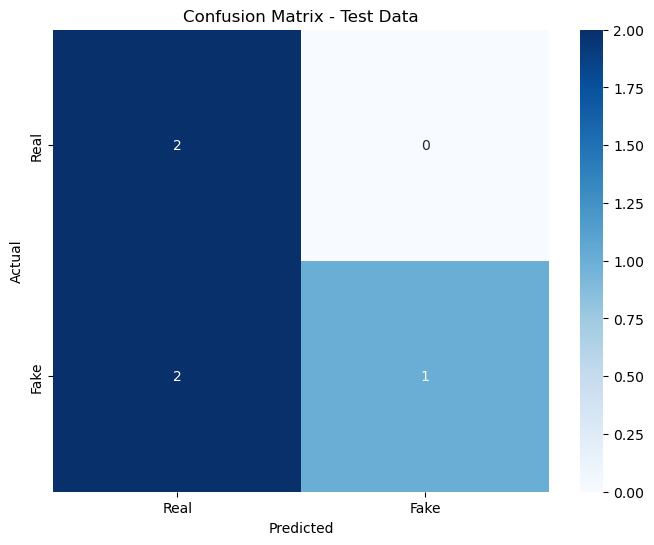


Predictions for Unseen Data:
Text: Breaking news: Major earthquake hits the city
Prediction: Real

Text: Scientists reveal new technology to combat climate change
Prediction: Real

Text: Celebrity seen vacationing in Bahamas after rumors of scandal
Prediction: Real

Text: Fake news: Politician caught embezzling funds
Prediction: Real

Model training and evaluation completed.


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Step 1: Create a larger fake news dataset
data = {
    'text': [
        "Breaking news! The stock market crashes today!",
        "NASA successfully lands rover on Mars",
        "Scientists discover life on another planet",
        "World leaders gather to discuss climate change",
        "Fake news alert: Popular celebrity dead!",
        "COVID-19 vaccines show 100% effectiveness!",
        "New breakthrough in renewable energy technology",
        "Politician announces groundbreaking economic reforms",
        "Celebrity endorses new diet plan",
        "Local restaurant wins best in city award!",
        "Government issues new tax policy",
        "International conference on climate change",
        "AI technology revolutionizes healthcare",
        "Study shows link between diet and health",
        "Celebrity gets arrested for scandal"
    ],
    'label': [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]  # 1 for Fake, 0 for Real
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
df.to_csv('fake_news_dataset.csv', index=False)

# Verify that the dataset is saved correctly
print("Fake News Dataset created:")
print(df)

# Step 2: Load the dataset
df = pd.read_csv('fake_news_dataset.csv')

# Inspect dataset
print("Dataset Shape:", df.shape)
print(df.head())

# Step 3: Data Preprocessing
# Drop rows with missing values (if any)
df = df.dropna(subset=['text', 'label'])

# Separate the features (X) and target (y)
X = df['text']
y = df['label']

# Step 4: Text Vectorization (Convert Text to Features)
# We will use TfidfVectorizer to convert the text into numerical features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the text data
X_tfidf = vectorizer.fit_transform(X)

# Step 5: Handle Imbalanced Data using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  # Change 'n_neighbors' to 'k_neighbors'
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 7: Model Training (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Step 8: Model Evaluation on Test Data (Already Labeled Data)
y_pred = model.predict(X_test)

# Calculate accuracy on test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

# Classification report (Precision, Recall, F1 Score)
print("Classification Report on test data:\n", classification_report(y_test, y_pred))

# Confusion Matrix on test data
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Predicting on Unseen Data (New Articles)
new_data = [
    "Breaking news: Major earthquake hits the city",
    "Scientists reveal new technology to combat climate change",
    "Celebrity seen vacationing in Bahamas after rumors of scandal",
    "Fake news: Politician caught embezzling funds"
]

# Step 10: Text Vectorization for new data
new_data_tfidf = vectorizer.transform(new_data)

# Predict using the trained model
new_predictions = model.predict(new_data_tfidf)

# Output predictions (0: Real, 1: Fake)
print("\nPredictions for Unseen Data:")
for i, text in enumerate(new_data):
    print(f"Text: {text}")
    print(f"Prediction: {'Fake' if new_predictions[i] == 1 else 'Real'}\n")

# Step 11: Optional: Hyperparameter Tuning, Save Model, etc.

print("Model training and evaluation completed.")


Dataset Shape: (21, 2)
                                             text  label
0  Breaking news! The stock market crashes today!      1
1           NASA successfully lands rover on Mars      0
2      Scientists discover life on another planet      0
3  World leaders gather to discuss climate change      0
4        Fake news alert: Popular celebrity dead!      1
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Accuracy on test data: 83.33%
Classification Report on test data:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



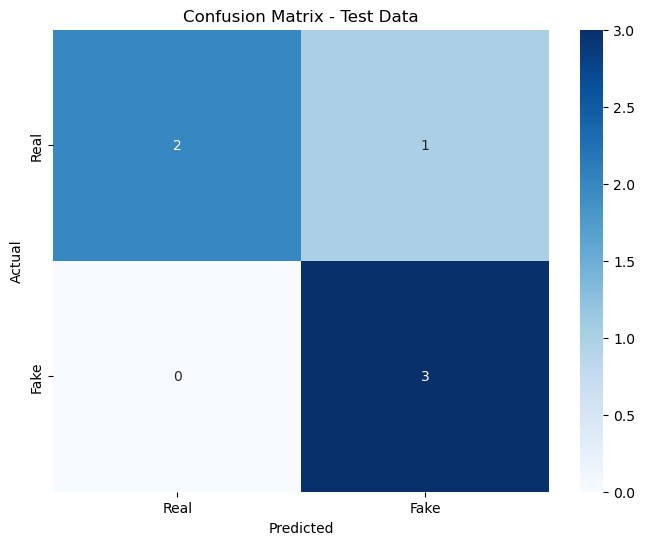


Predictions for Unseen Data:
Text: Breaking news: Major earthquake hits the city
Prediction: Fake

Text: Scientists reveal new technology to combat climate change
Prediction: Real

Text: Celebrity seen vacationing in Bahamas after rumors of scandal
Prediction: Real

Text: Fake news: Politician caught embezzling funds
Prediction: Real

Text: Real: New research shows benefits of meditation on mental health
Prediction: Real

Text: False: NASA finds water on Mars in huge quantities
Prediction: Real

Text: Chetna is my girlfriend
Prediction: Real

Text: earthquack is too normal
Prediction: Real

Model training and evaluation completed.


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Step 1: Create a larger fake news dataset (with more examples)
data = {
    'text': [
        "Breaking news! The stock market crashes today!",
        "NASA successfully lands rover on Mars",
        "Scientists discover life on another planet",
        "World leaders gather to discuss climate change",
        "Fake news alert: Popular celebrity dead!",
        "COVID-19 vaccines show 100% effectiveness!",
        "New breakthrough in renewable energy technology",
        "Politician announces groundbreaking economic reforms",
        "Celebrity endorses new diet plan",
        "Local restaurant wins best in city award!",
        "Government issues new tax policy",
        "International conference on climate change",
        "AI technology revolutionizes healthcare",
        "Study shows link between diet and health",
        "Celebrity gets arrested for scandal",
        "Fake news: Scientists find evidence of alien life!",
        "Exclusive: Government to change healthcare laws",
        "New tech startup disrupts traditional industries",
        "Breaking: Earthquake strikes California causing major damage",
        "Fake: Famous actor caught cheating on their spouse",
        "Real: Groundbreaking surgery performed successfully on cancer patient"
        
    ],
    'label': [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0]  # 1 for Fake, 0 for Real
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
df.to_csv('fake_news_dataset.csv', index=False)

# Step 2: Load the dataset
df = pd.read_csv('fake_news_dataset.csv')

# Inspect dataset
print("Dataset Shape:", df.shape)
print(df.head())

# Step 3: Data Preprocessing
# Drop rows with missing values (if any)
df = df.dropna(subset=['text', 'label'])

# Separate the features (X) and target (y)
X = df['text']
y = df['label']

# Step 4: Text Vectorization (Convert Text to Features)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Step 5: Handle Imbalanced Data using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  
X_tfidf = vectorizer.fit_transform(X)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 7: Model Training (Random Forest Classifier)
model = make_pipeline(StandardScaler(with_mean=False), RandomForestClassifier(n_estimators=100, random_state=42))

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Step 8: Model Evaluation on Test Data (Already Labeled Data)
y_pred = best_model.predict(X_test)

# Calculate accuracy on test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

# Classification report (Precision, Recall, F1 Score)
print("Classification Report on test data:\n", classification_report(y_test, y_pred))

# Confusion Matrix on test data
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Predicting on Unseen Data (New Articles)
new_data = [
    "Breaking news: Major earthquake hits the city",
    "Scientists reveal new technology to combat climate change",
    "Celebrity seen vacationing in Bahamas after rumors of scandal",
    "Fake news: Politician caught embezzling funds",
    "Real: New research shows benefits of meditation on mental health",
    "False: NASA finds water on Mars in huge quantities",
    "Chetna is my girlfriend",
    "earthquack is too normal"
    
]

# Step 10: Text Vectorization for new data
new_data_tfidf = vectorizer.transform(new_data)

# Predict using the trained model
new_predictions = best_model.predict(new_data_tfidf)

# Output predictions (0: Real, 1: Fake)
print("\nPredictions for Unseen Data:")
for i, text in enumerate(new_data):
    print(f"Text: {text}")
    print(f"Prediction: {'Fake' if new_predictions[i] == 1 else 'Real'}\n")

# Step 11: Optional: Save Model, etc.
# joblib.dump(best_model, 'fake_news_model.pkl')

print("Model training and evaluation completed.")


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Step 1: Create a larger fake news dataset (with more examples)
data = {
    'text': [
        # Real news examples
        "NASA successfully lands rover on Mars",
        "Scientists discover life on another planet",
        "World leaders gather to discuss climate change",
        "COVID-19 vaccines show 100% effectiveness!",
        "New breakthrough in renewable energy technology",
        "Politician announces groundbreaking economic reforms",
        "Celebrity endorses new diet plan",
        "Local restaurant wins best in city award!",
        "Government issues new tax policy",
        "International conference on climate change",
        "AI technology revolutionizes healthcare",
        "Study shows link between diet and health",
        "Celebrity gets arrested for scandal",
        "Breaking: Earthquake strikes California causing major damage",
        "Real: Groundbreaking surgery performed successfully on cancer patient",
        "Real: New research shows benefits of meditation on mental health",
        "Scientists reveal new technology to combat climate change",

        # Fake news examples
        "Fake news alert: Popular celebrity dead!",
        "Fake news: Scientists find evidence of alien life!",
        "Exclusive: Government to change healthcare laws",
        "Fake news: Major earthquake hits the city",
        "Fake: Famous actor caught cheating on their spouse",
        "False: NASA finds water on Mars in huge quantities",
        "Breaking news! The stock market crashes today!",
        "Fake news: Politician caught embezzling funds",
        "Celebrity seen vacationing in Bahamas after rumors of scandal",
        "Fake: Politician resigns after scandal",
        "Fake: New technology invented that can cure all diseases instantly",
        "Fake News: Unidentified flying object spotted over New York",
        "Breaking News: Massive asteroid heading towards Earth",
        "Breaking news! Secret government project exposed!",
        "Fake news: Fake moon landing revealed",
        "Fake news: Alien invasion imminent",
        "Real: Major medical breakthrough to cure Alzheimer's",
        "Real: Huge leap in green energy technology announced"
    ],
    'label': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]  # 0 for Real, 1 for Fake
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
df.to_csv('fake_news_dataset.csv', index=False)

# Step 2: Load the dataset
df = pd.read_csv('fake_news_dataset.csv')

# Inspect dataset
print("Dataset Shape:", df.shape)
print(df.head())

# Step 3: Data Preprocessing
# Drop rows with missing values (if any)
df = df.dropna(subset=['text', 'label'])

# Separate the features (X) and target (y)
X = df['text']
y = df['label']

# Step 4: Text Vectorization (Convert Text to Features)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Step 5: Handle Imbalanced Data using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  
X_tfidf = vectorizer.fit_transform(X)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 7: Model Training (Random Forest Classifier)
model = make_pipeline(StandardScaler(with_mean=False), RandomForestClassifier(n_estimators=100, random_state=42))

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Step 8: Model Evaluation on Test Data (Already Labeled Data)
y_pred = best_model.predict(X_test)

# Calculate accuracy on test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

# Classification report (Precision, Recall, F1 Score)
print("Classification Report on test data:\n", classification_report(y_test, y_pred))

# Confusion Matrix on test data
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Predicting on Unseen Data (New Articles)
new_data = [
    "Breaking news: Major earthquake hits the city",
    "Scientists reveal new technology to combat climate change",
    "Celebrity seen vacationing in Bahamas after rumors of scandal",
    "Fake news: Politician caught embezzling funds",
    "Real: New research shows benefits of meditation on mental health",
    "False: NASA finds water on Mars in huge quantities",
    "Chetna is my girlfriend",
    "earthquack is too normal"
]

# Step 10: Text Vectorization for new data
new_data_tfidf = vectorizer.transform(new_data)

# Predict using the trained model
new_predictions = best_model.predict(new_data_tfidf)

# Output predictions (0: Real, 1: Fake)
print("\nPredictions for Unseen Data:")
for i, text in enumerate(new_data):
    print(f"Text: {text}")
    print(f"Prediction: {'Fake' if new_predictions[i] == 1 else 'Real'}\n")

# Step 11: Optional: Save Model, etc.
# joblib.dump(best_model, 'fake_news_model.pkl')

print("Model training and evaluation completed.")


ValueError: All arrays must be of the same length

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Step 1: Create a larger fake news dataset (with more examples)
data = {
    'text': [
        # Real news examples
        "NASA successfully lands rover on Mars",
        "Scientists discover life on another planet",
        "World leaders gather to discuss climate change",
        "COVID-19 vaccines show 100% effectiveness!",
        "New breakthrough in renewable energy technology",
        "Politician announces groundbreaking economic reforms",
        "Celebrity endorses new diet plan",
        "Local restaurant wins best in city award!",
        "Government issues new tax policy",
        "International conference on climate change",
        "AI technology revolutionizes healthcare",
        "Study shows link between diet and health",
        "Celebrity gets arrested for scandal",
        "Breaking: Earthquake strikes California causing major damage",
        "Real: Groundbreaking surgery performed successfully on cancer patient",
        "Real: New research shows benefits of meditation on mental health",
        "Scientists reveal new technology to combat climate change",

        # Fake news examples
        "Fake news alert: Popular celebrity dead!",
        "Fake news: Scientists find evidence of alien life!",
        "Exclusive: Government to change healthcare laws",
        "Fake news: Major earthquake hits the city",
        "Fake: Famous actor caught cheating on their spouse",
        "False: NASA finds water on Mars in huge quantities",
        "Breaking news! The stock market crashes today!",
        "Fake news: Politician caught embezzling funds",
        "Celebrity seen vacationing in Bahamas after rumors of scandal",
        "Fake: Politician resigns after scandal",
        "Fake: New technology invented that can cure all diseases instantly",
        "Fake News: Unidentified flying object spotted over New York",
        "Breaking News: Massive asteroid heading towards Earth",
        "Breaking news! Secret government project exposed!",
        "Fake news: Fake moon landing revealed",
        "Fake news: Alien invasion imminent",
        "Real: Major medical breakthrough to cure Alzheimer's",
        "Real: Huge leap in green energy technology announced"
    ],
    'label': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]  # 0 for Real, 1 for Fake
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
df.to_csv('fake_news_dataset.csv', index=False)

# Step 2: Load the dataset
df = pd.read_csv('fake_news_dataset.csv')

# Inspect dataset
print("Dataset Shape:", df.shape)
print(df.head())

# Step 3: Data Preprocessing
# Drop rows with missing values (if any)
df = df.dropna(subset=['text', 'label'])

# Separate the features (X) and target (y)
X = df['text']
y = df['label']

# Step 4: Text Vectorization (Convert Text to Features)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Step 5: Handle Imbalanced Data using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  
X_tfidf = vectorizer.fit_transform(X)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 7: Model Training (Random Forest Classifier)
model = make_pipeline(StandardScaler(with_mean=False), RandomForestClassifier(n_estimators=100, random_state=42))

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Step 8: Model Evaluation on Test Data (Already Labeled Data)
y_pred = best_model.predict(X_test)

# Calculate accuracy on test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

# Classification report (Precision, Recall, F1 Score)
print("Classification Report on test data:\n", classification_report(y_test, y_pred))

# Confusion Matrix on test data
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Predicting on Unseen Data (New Articles)
new_data = [
    "Breaking news: Major earthquake hits the city",
    "Scientists reveal new technology to combat climate change",
    "Celebrity seen vacationing in Bahamas after rumors of scandal",
    "Fake news: Politician caught embezzling funds",
    "Real: New research shows benefits of meditation on mental health",
    "False: NASA finds water on Mars in huge quantities",
    "Chetna is my girlfriend",
    "earthquack is too normal"
]

# Step 10: Text Vectorization for new data
new_data_tfidf = vectorizer.transform(new_data)

# Predict using the trained model
new_predictions = best_model.predict(new_data_tfidf)

# Output predictions (0: Real, 1: Fake)
print("\nPredictions for Unseen Data:")
for i, text in enumerate(new_data):
    print(f"Text: {text}")
    print(f"Prediction: {'Fake' if new_predictions[i] == 1 else 'Real'}\n")

# Step 11: Optional: Save Model, etc.
# joblib.dump(best_model, 'fake_news_model.pkl')

print("Model training and evaluation completed.")


ValueError: All arrays must be of the same length

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Step 1: Create a larger fake news dataset (with more examples)
data = {
    'text': [
        # Real news examples
        "NASA successfully lands rover on Mars",
        "Scientists discover life on another planet",
        "World leaders gather to discuss climate change",
        "COVID-19 vaccines show 100% effectiveness!",
        "New breakthrough in renewable energy technology",
        "Politician announces groundbreaking economic reforms",
        "Celebrity endorses new diet plan",
        "Local restaurant wins best in city award!",
        "Government issues new tax policy",
        "International conference on climate change",
        "AI technology revolutionizes healthcare",
        "Study shows link between diet and health",
        "Celebrity gets arrested for scandal",
        "Breaking: Earthquake strikes California causing major damage",
        "Real: Groundbreaking surgery performed successfully on cancer patient",
        "Real: New research shows benefits of meditation on mental health",
        "Scientists reveal new technology to combat climate change",
        "Government to change healthcare laws",
        "Major earthquake hits the city",
        "Famous actor caught cheating on their spouse",
        "NASA finds water on Mars in huge quantities",
        "Stock market crashes today",
        "Politician caught embezzling funds",
        "Celebrity seen vacationing in Bahamas after rumors of scandal",
        "Politician resigns after scandal",
        "New technology invented that can cure all diseases instantly",
        "Unidentified flying object spotted over New York",
        "Massive asteroid heading towards Earth",
        "Secret government project exposed",
        "Fake moon landing revealed",
        "Alien invasion imminent",
        "Major medical breakthrough to cure Alzheimer's",
        "Huge leap in green energy technology announced"
    ],
    'label': [
        # 0 for Real, 1 for Fake
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
df.to_csv('fake_news_dataset.csv', index=False)

# Step 2: Load the dataset
df = pd.read_csv('fake_news_dataset.csv')

# Inspect dataset
print("Dataset Shape:", df.shape)
print(df.head())

# Step 3: Data Preprocessing
# Drop rows with missing values (if any)
df = df.dropna(subset=['text', 'label'])

# Separate the features (X) and target (y)
X = df['text']
y = df['label']

# Step 4: Text Vectorization (Convert Text to Features)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Step 5: Handle Imbalanced Data using SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)  
X_tfidf = vectorizer.fit_transform(X)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 7: Model Training (Random Forest Classifier)
model = make_pipeline(StandardScaler(with_mean=False), RandomForestClassifier(n_estimators=100, random_state=42))

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Step 8: Model Evaluation on Test Data (Already Labeled Data)
y_pred = best_model.predict(X_test)

# Calculate accuracy on test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

# Classification report (Precision, Recall, F1 Score)
print("Classification Report on test data:\n", classification_report(y_test, y_pred))

# Confusion Matrix on test data
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Predicting on Unseen Data (New Articles)
new_data = [
    "Breaking news: Major earthquake hits the city",
    "Scientists reveal new technology to combat climate change",
    "Celebrity seen vacationing in Bahamas after rumors of scandal",
    "Fake news: Politician caught embezzling funds",
    "Real: New research shows benefits of meditation on mental health",
    "False: NASA finds water on Mars in huge quantities",
    "Chetna is my girlfriend",
    "earthquack is too normal"
]

# Step 10: Text Vectorization for new data
new_data_tfidf = vectorizer.transform(new_data)

# Predict using the trained model
new_predictions = best_model.predict(new_data_tfidf)

# Output predictions (0: Real, 1: Fake)
print("\nPredictions for Unseen Data:")
for i, text in enumerate(new_data):
    print(f"Text: {text}")
    print(f"Prediction: {'Fake' if new_predictions[i] == 1 else 'Real'}\n")

# Step 11: Optional: Save Model, etc.
# joblib.dump(best_model, 'fake_news_model.pkl')

print("Model training and evaluation completed.")


ValueError: All arrays must be of the same length

In [8]:
import cv2
import numpy as np

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Age categories and pre-trained age model paths
AGE_BUCKETS = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', 
               '(38-43)', '(48-53)', '(60-100)']

# Pre-trained age model available in OpenCV's GitHub
age_model = cv2.dnn.readNetFromCaffe(
    'https://raw.githubusercontent.com/spmallick/learnopencv/master/AgeGender/opencv_face_detector/age_deploy.prototxt',
    'https://github.com/spmallick/learnopencv/raw/master/AgeGender/opencv_face_detector/age_net.caffemodel'
)

def detect_age(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        face_img = image[y:y + h, x:x + w]
        blob = cv2.dnn.blobFromImage(face_img, 1.0, (227, 227), [104, 117, 123], swapRB=False)
        age_model.setInput(blob)
        age_preds = age_model.forward()
        age = AGE_BUCKETS[age_preds[0].argmax()]

        label = f"Age: {age}"
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    return image

# Load the image
image_path = 'path_to_image.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Image not found or unable to load.")
else:
    result = detect_age(image)
    cv2.imshow("Age Detection", result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\caffe\caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "https://raw.githubusercontent.com/spmallick/learnopencv/master/AgeGender/opencv_face_detector/age_deploy.prototxt" in function 'cv::dnn::ReadProtoFromTextFile'
